In [1]:

import instructor
from pydantic import BaseModel, Field
from openai import OpenAI
from enum import Enum
from typing import List
import pandas as pd
import os


In [2]:
# Define the path to the data folder, going up one directory
data_folder = os.path.join('..', 'data')

# Read the datasets into DataFrames
df = pd.read_csv(os.path.join(data_folder, 'Youtube-Spam-Dataset.csv'))  # Adjust the filename as needed

## Youtube comment Spam Classification

SOURCE = https://www.kaggle.com/datasets/ahsenwaheed/youtube-comments-spam-dataset

Spam Comment: 1
Not Spam Comment: 0


In [3]:

# Create new column called youtube_comment where there is
# author: df['AUTHOR'], date: df['DATE'], video_name: df['VIDEO_NAME'], comment: df['CONTENT']
df['youtube_comment'] = 'Author: ' + df['AUTHOR'] + ' Video Name: ' + df['VIDEO_NAME'] + ' Comment: ' + df['CONTENT']

In [4]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,youtube_comment
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,Author: Julius NM Video Name: PSY - GANGNAM ST...
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,Author: adam riyati Video Name: PSY - GANGNAM ...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,Author: Evgeny Murashkin Video Name: PSY - GAN...
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,Author: ElNino Melendez Video Name: PSY - GANG...
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,Author: GsMega Video Name: PSY - GANGNAM STYLE...
...,...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,Author: Katie Mettam Video Name: Shakira - Wak...
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,Author: Sabina Pearson-Smith Video Name: Shaki...
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0,Author: jeffrey jules Video Name: Shakira - Wa...
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0,Author: Aishlin Maciel Video Name: Shakira - W...


### EDA


In [5]:
# Create columns showing the length of the strings in the AUTHOR, CONTENT, VIDEO_NAME, and youtube_comment columns
# Since they are strings, count the number of words and characters

# Number of words
df['AUTHOR Length Words'] = df['AUTHOR'].apply(lambda x: len(x.split()))
df['CONTENT Length Words'] = df['CONTENT'].apply(lambda x: len(x.split()))
df['VIDEO_NAME Length Words'] = df['VIDEO_NAME'].apply(lambda x: len(x.split()))
df['youtube_comment Length Words'] = df['youtube_comment'].apply(lambda x: len(x.split()))

# Number of characters
df['AUTHOR Length Characters'] = df['AUTHOR'].apply(lambda x: len(x))
df['CONTENT Length Characters'] = df['CONTENT'].apply(lambda x: len(x))
df['VIDEO_NAME Length Characters'] = df['VIDEO_NAME'].apply(lambda x: len(x))
df['youtube_comment Length Characters'] = df['youtube_comment'].apply(lambda x: len(x))


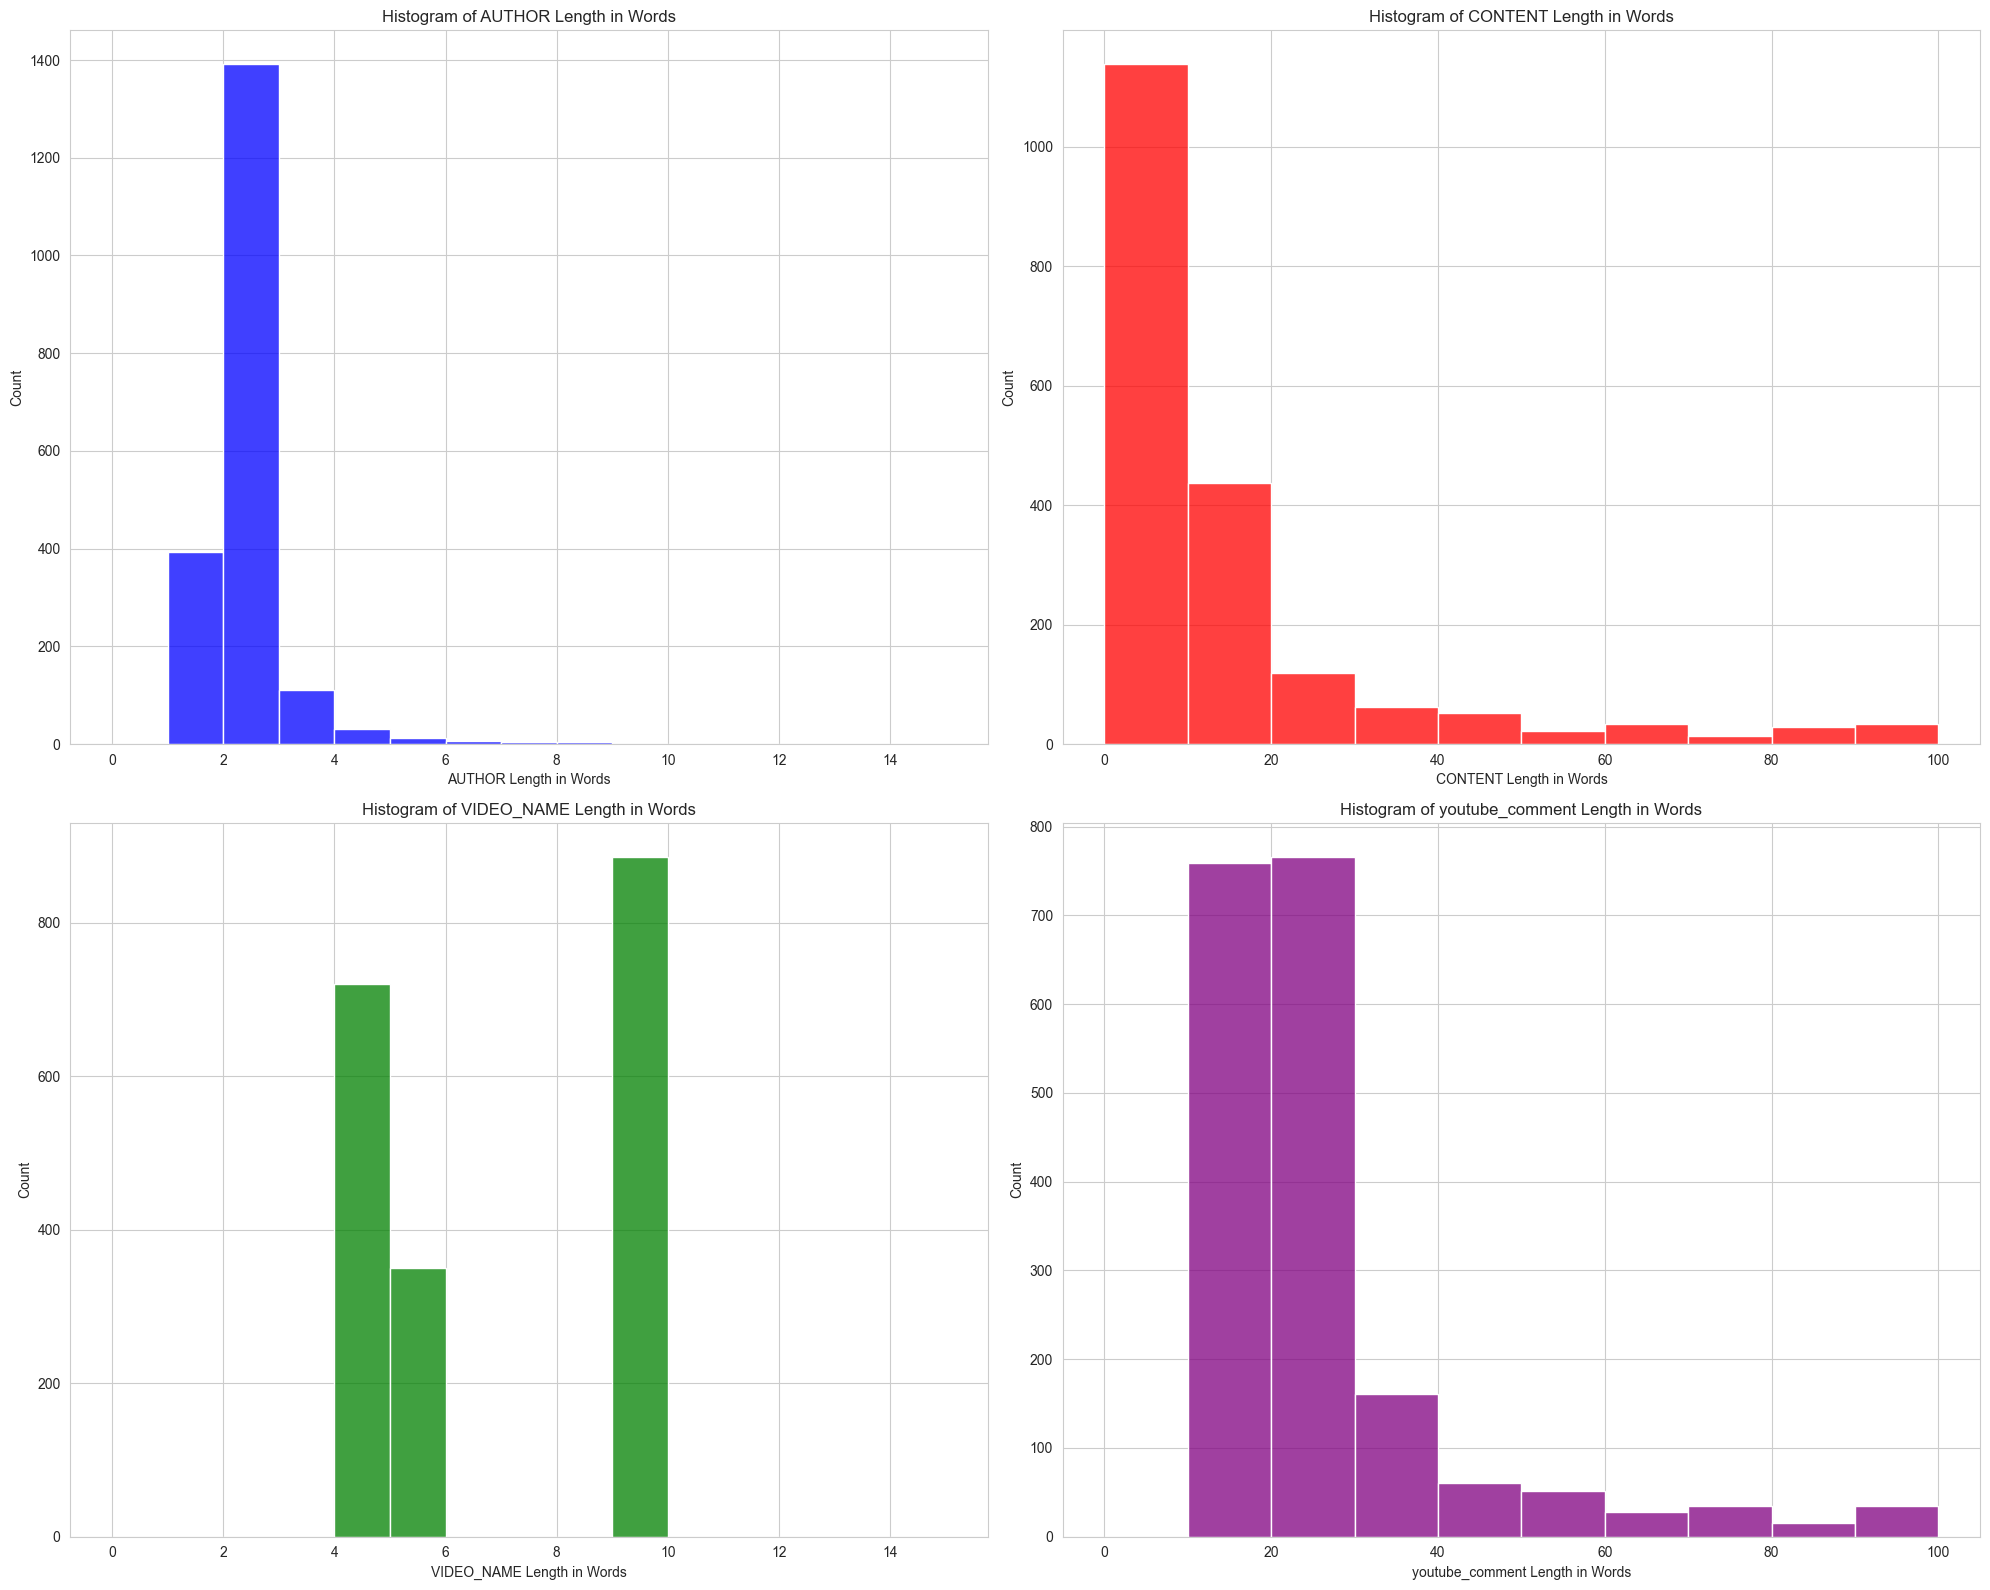

In [6]:
# Histogram of Words using seaborn
# This section creates a histogram for 'AUTHOR Length Words', 'CONTENT Length Words', 'VIDEO_NAME Length Words', and 'youtube_comment Length Words'
# with bins ranging from 0 to 100, incrementing by 10. The plot is well-documented and labeled.

import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Creating a figure and axis object
fig, ax = plt.subplots(2, 2, figsize=(20, 16))  # 2 rows, 2 columns, figure size

# Plotting the histogram for 'AUTHOR Length Words'
sns.histplot(df['AUTHOR Length Words'], bins=range(0, 16, 1), ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Histogram of AUTHOR Length in Words')
ax[0, 0].set_xlabel('AUTHOR Length in Words')
ax[0, 0].set_ylabel('Count')

# Plotting the histogram for 'CONTENT Length Words'
sns.histplot(df['CONTENT Length Words'], bins=range(0, 101, 10), ax=ax[0, 1], color='red')
ax[0, 1].set_title('Histogram of CONTENT Length in Words')
ax[0, 1].set_xlabel('CONTENT Length in Words')
ax[0, 1].set_ylabel('Count')

# Plotting the histogram for 'VIDEO_NAME Length Words'
sns.histplot(df['VIDEO_NAME Length Words'], bins=range(0, 16, 1), ax=ax[1, 0], color='green')
ax[1, 0].set_title('Histogram of VIDEO_NAME Length in Words')
ax[1, 0].set_xlabel('VIDEO_NAME Length in Words')
ax[1, 0].set_ylabel('Count')

# Plotting the histogram for 'youtube_comment Length Words'
sns.histplot(df['youtube_comment Length Words'], bins=range(0, 101, 10), ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Histogram of youtube_comment Length in Words')
ax[1, 1].set_xlabel('youtube_comment Length in Words')
ax[1, 1].set_ylabel('Count')

# Displaying the plot
plt.tight_layout()
plt.show()


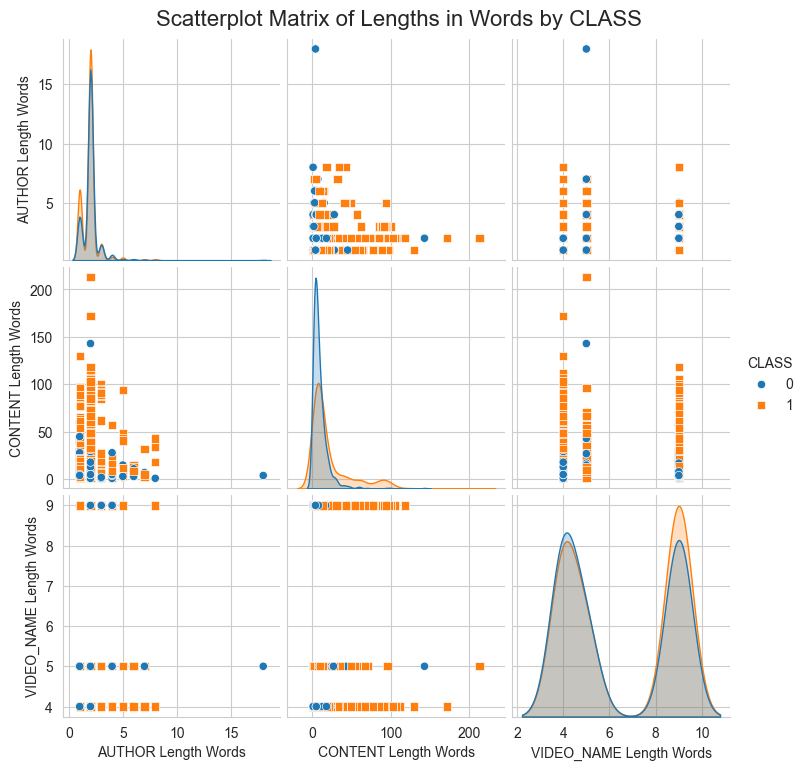

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set_style("whitegrid")



# Drop rows with NaN values in the relevant columns
df_cleaned = df[['AUTHOR Length Words', 'CONTENT Length Words', 'VIDEO_NAME Length Words', 'CLASS']].dropna()

# Plotting the scatterplot matrix
sns.pairplot(df_cleaned, vars=['AUTHOR Length Words', 'CONTENT Length Words', 'VIDEO_NAME Length Words'], 
             hue='CLASS', markers=['o', 's'])

# Setting title for the scatterplot matrix
plt.suptitle('Scatterplot Matrix of Lengths in Words by CLASS', fontsize=16, y=1.02)

# Displaying the plot
plt.show()


#### LLM Classification

In [8]:
# Initialize the OpenAI client
client = instructor.patch(OpenAI())

# Define the data model for classification
class YTCategory(str, Enum):
    SPAM = "Spam Comment" 
    NOT_SPAM = "Not Spam Comment" 

class YTClassification(BaseModel):
    category: YTCategory
    confidence: float = Field(ge=0, le=1, description="Confidence score for the classification")


In [9]:
SYSTEM_PROMPT = """
You are an AI assistant for a large customer support team. 
Here you are analyzing youtube comments and classifying them as spam or not spam.
You will be given the name of the author, the name of the video, and the comment.

Your tasks:
1. Categorize the ticket into the most appropriate category.
2. Provide a confidence score for the classification.

Remember:
- Be objective and base your analysis solely on the information provided in the ticket.
- If you're unsure about any aspect, reflect that in your confidence score.

Analyze the following customer support ticket and provide the requested information in the specified format.
"""

def classify_ticket(ticket_text: str) -> YTClassification:
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        response_model=YTClassification,
        temperature=0,
        max_retries=3,
        messages=[
            {
                "role": "system",
                "content": SYSTEM_PROMPT,
            },
            {"role": "user", "content": ticket_text}
        ]
    )
    return response

In [10]:
# Get only 500 observations, and ensure that the column youtube_comment is a string
subset = df.iloc[:500, :]
subset['youtube_comment'] = subset['youtube_comment'].astype(str)



C:\Users\Caleb\AppData\Local\Temp\ipykernel_46092\3307360086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['youtube_comment'] = subset['youtube_comment'].astype(str)


In [11]:
subset

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,youtube_comment,AUTHOR Length Words,CONTENT Length Words,VIDEO_NAME Length Words,youtube_comment Length Words,AUTHOR Length Characters,CONTENT Length Characters,VIDEO_NAME Length Characters,youtube_comment Length Characters
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,Author: Julius NM Video Name: PSY - GANGNAM ST...,2,8,5,19,9,56,30,126
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,Author: adam riyati Video Name: PSY - GANGNAM ...,2,30,5,41,11,166,30,238
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,Author: Evgeny Murashkin Video Name: PSY - GAN...,2,8,5,19,16,38,30,115
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,Author: ElNino Melendez Video Name: PSY - GANG...,2,11,5,22,15,48,30,124
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,Author: GsMega Video Name: PSY - GANGNAM STYLE...,1,5,5,15,6,39,30,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,z13byjoiuqvhctxc423ahhxafrizwhfto,tonya parker,2014-09-21T23:01:03,This is the best of the best video in world!!!...,Katy Perry - Roar,0,Author: tonya parker Video Name: Katy Perry - ...,2,10,4,20,12,73,17,133
496,z13wvdhxeyqeidsmz22jehupivbqxjvtp,Ramen Noodles,2014-09-22T05:28:44,"She's got it all. Incredible voice, extremely ...",Katy Perry - Roar,0,Author: Ramen Noodles Video Name: Katy Perry -...,2,10,4,20,13,61,17,122
497,z132zl1rupqcylbep23jgfig3um3ct5vv,KatyPerry TheQueenOfPop,2014-09-22T06:50:24,--&gt;ATTENTION KATYCATS! Katy leads with 7 no...,Katy Perry - Roar,1,Author: KatyPerry TheQueenOfPop Video Name: Ka...,2,28,4,38,23,158,17,229
498,z133unbosvyetbf4n04ccboqbqnydzhrtg4,tomo fr,2014-09-22T08:36:36,I really like this song.﻿,Katy Perry - Roar,0,Author: tomo fr Video Name: Katy Perry - Roar ...,2,5,4,15,7,25,17,80


In [12]:

# Classify each entry in the new 'article' column
subset['Classification'] = subset['youtube_comment'].apply(classify_ticket)



C:\Users\Caleb\AppData\Local\Temp\ipykernel_46092\537558600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Classification'] = subset['youtube_comment'].apply(classify_ticket)


In [13]:
subset

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,youtube_comment,AUTHOR Length Words,CONTENT Length Words,VIDEO_NAME Length Words,youtube_comment Length Words,AUTHOR Length Characters,CONTENT Length Characters,VIDEO_NAME Length Characters,youtube_comment Length Characters,Classification
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,Author: Julius NM Video Name: PSY - GANGNAM ST...,2,8,5,19,9,56,30,126,category=<YTCategory.SPAM: 'Spam Comment'> con...
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,Author: adam riyati Video Name: PSY - GANGNAM ...,2,30,5,41,11,166,30,238,category=<YTCategory.SPAM: 'Spam Comment'> con...
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,Author: Evgeny Murashkin Video Name: PSY - GAN...,2,8,5,19,16,38,30,115,category=<YTCategory.SPAM: 'Spam Comment'> con...
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,Author: ElNino Melendez Video Name: PSY - GANG...,2,11,5,22,15,48,30,124,category=<YTCategory.SPAM: 'Spam Comment'> con...
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,Author: GsMega Video Name: PSY - GANGNAM STYLE...,1,5,5,15,6,39,30,106,category=<YTCategory.SPAM: 'Spam Comment'> con...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,z13byjoiuqvhctxc423ahhxafrizwhfto,tonya parker,2014-09-21T23:01:03,This is the best of the best video in world!!!...,Katy Perry - Roar,0,Author: tonya parker Video Name: Katy Perry - ...,2,10,4,20,12,73,17,133,category=<YTCategory.NOT_SPAM: 'Not Spam Comme...
496,z13wvdhxeyqeidsmz22jehupivbqxjvtp,Ramen Noodles,2014-09-22T05:28:44,"She's got it all. Incredible voice, extremely ...",Katy Perry - Roar,0,Author: Ramen Noodles Video Name: Katy Perry -...,2,10,4,20,13,61,17,122,category=<YTCategory.SPAM: 'Spam Comment'> con...
497,z132zl1rupqcylbep23jgfig3um3ct5vv,KatyPerry TheQueenOfPop,2014-09-22T06:50:24,--&gt;ATTENTION KATYCATS! Katy leads with 7 no...,Katy Perry - Roar,1,Author: KatyPerry TheQueenOfPop Video Name: Ka...,2,28,4,38,23,158,17,229,category=<YTCategory.SPAM: 'Spam Comment'> con...
498,z133unbosvyetbf4n04ccboqbqnydzhrtg4,tomo fr,2014-09-22T08:36:36,I really like this song.﻿,Katy Perry - Roar,0,Author: tomo fr Video Name: Katy Perry - Roar ...,2,5,4,15,7,25,17,80,category=<YTCategory.NOT_SPAM: 'Not Spam Comme...


In [14]:
subset['Classification'][0]


YTClassification(category=<YTCategory.SPAM: 'Spam Comment'>, confidence=0.9)

Observations with confidence above 0.9: 61
Observations with confidence between 0.6 and 0.9: 439
Observations with confidence below 0.6: 0


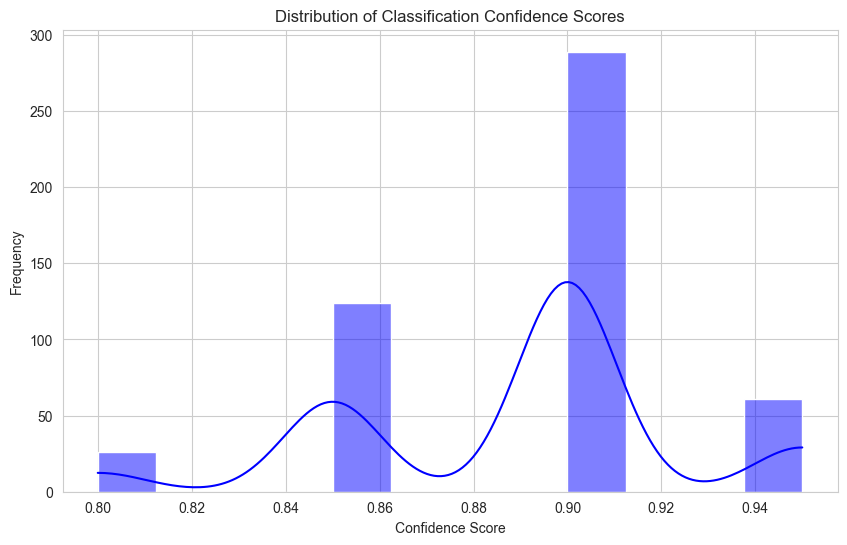

In [15]:
# Assuming 'Classification' is a column containing LanguageClassification objects
# Extract the confidence scores from the Classification column
confidence_scores = subset['Classification'].apply(lambda x: x.confidence)

# Count observations based on confidence levels
above_0_9 = (confidence_scores > 0.9).sum()
between_0_6_and_0_9 = ((confidence_scores >= 0.6) & (confidence_scores <= 0.9)).sum()
below_0_6 = (confidence_scores < 0.6).sum()

# Print the results
print(f"Observations with confidence above 0.9: {above_0_9}")
print(f"Observations with confidence between 0.6 and 0.9: {between_0_6_and_0_9}")
print(f"Observations with confidence below 0.6: {below_0_6}")

# Plotting the distribution of confidence scores using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the distribution of confidence scores
sns.histplot(confidence_scores, kde=True, ax=ax, color='blue')

# Setting the title and labels
ax.set_title('Distribution of Classification Confidence Scores')
ax.set_xlabel('Confidence Score')
ax.set_ylabel('Frequency')

# Displaying the plot
plt.show()

In [16]:
# Define a mapping function using the EmailCategory enum
def map_classification(classification):
    # Access the category attribute
    category = classification.category
    if category == YTCategory.SPAM:
        return 1
    elif category == YTCategory.NOT_SPAM:
        return 0


# Create a new column 'Email Classification' based on the mapping
subset['Comment Classification'] = subset['Classification'].apply(map_classification)

# Display the updated DataFrame with the new column
print(subset[['youtube_comment', 'Classification', 'Comment Classification']].head())



                                     youtube_comment  \
0  Author: Julius NM Video Name: PSY - GANGNAM ST...   
1  Author: adam riyati Video Name: PSY - GANGNAM ...   
2  Author: Evgeny Murashkin Video Name: PSY - GAN...   
3  Author: ElNino Melendez Video Name: PSY - GANG...   
4  Author: GsMega Video Name: PSY - GANGNAM STYLE...   

                                      Classification  Comment Classification  
0  category=<YTCategory.SPAM: 'Spam Comment'> con...                       1  
1  category=<YTCategory.SPAM: 'Spam Comment'> con...                       1  
2  category=<YTCategory.SPAM: 'Spam Comment'> con...                       1  
3  category=<YTCategory.SPAM: 'Spam Comment'> con...                       1  
4  category=<YTCategory.SPAM: 'Spam Comment'> con...                       1  


C:\Users\Caleb\AppData\Local\Temp\ipykernel_46092\1413331038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Comment Classification'] = subset['Classification'].apply(map_classification)


In [17]:
subset[['youtube_comment', 'Classification', 'Comment Classification', 'CLASS']]

,youtube_comment,Classification,Comment Classification,CLASS
0,Author: Julius NM Video Name: PSY - GANGNAM ST...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,1
1,Author: adam riyati Video Name: PSY - GANGNAM ...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,1
2,Author: Evgeny Murashkin Video Name: PSY - GAN...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,1
3,Author: ElNino Melendez Video Name: PSY - GANG...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,1
4,Author: GsMega Video Name: PSY - GANGNAM STYLE...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,1
...,...,...,...,...
495,Author: tonya parker Video Name: Katy Perry - ...,category=<YTCategory.NOT_SPAM: 'Not Spam Comme...,0,0
496,Author: Ramen Noodles Video Name: Katy Perry -...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,0
497,Author: KatyPerry TheQueenOfPop Video Name: Ka...,category=<YTCategory.SPAM: 'Spam Comment'> con...,1,1
498,Author: tomo fr Video Name: Katy Perry - Roar ...,category=<YTCategory.NOT_SPAM: 'Not Spam Comme...,0,0


In [18]:
print("Accuracy: ", (subset['Comment Classification'] == subset['CLASS']).mean())

Accuracy:  0.912


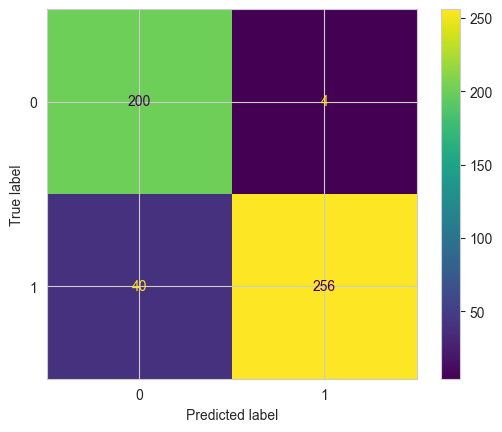

In [19]:
# Show a confusion matrix of our binary classification
# The real Y is Email Type, and the predicted Y is Email Classification


from sklearn.metrics import confusion_matrix
confusion_matrix(subset['Comment Classification'], subset['CLASS'])

# Have a plot or visualization of the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(subset['Comment Classification'], subset['CLASS'])


### Traditional Machine Learning Classification


Accuracy on the test set: 0.7200


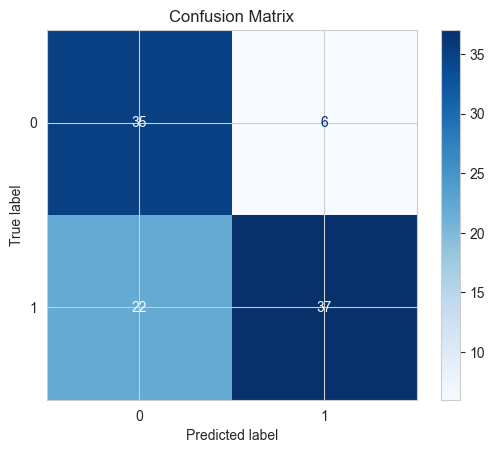

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Assuming 'subset' is your DataFrame
# Drop the specified columns
X = subset.drop(columns=['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'VIDEO_NAME', 'CLASS', 'youtube_comment', 'Classification', 'Comment Classification'])
y = subset['CLASS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model with regularization
model = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

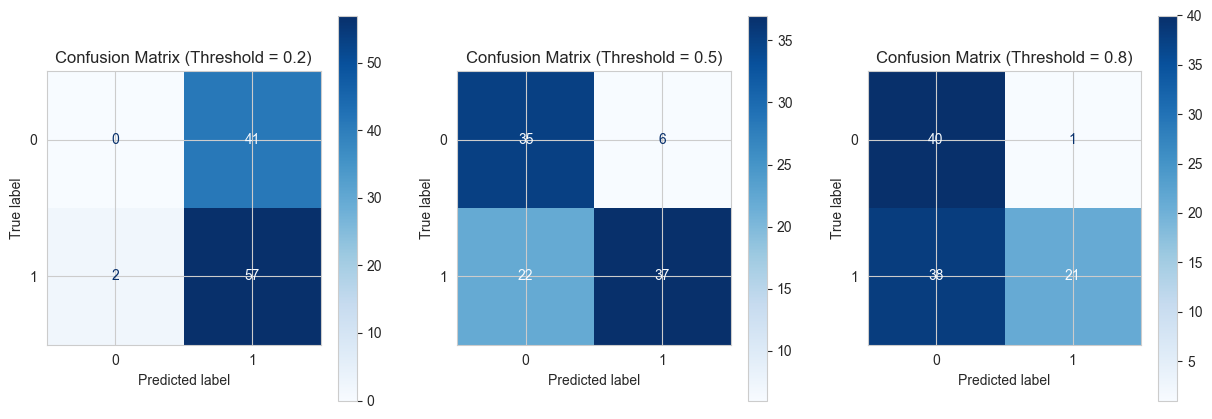

In [21]:
# Set the threshold for classification
thresholds = [0.2, 0.5, 0.8]

# Create a figure and axis for each threshold
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the confusion matrix for each threshold
for i, threshold in enumerate(thresholds):
    y_pred_threshold = (model.predict_proba(X_test)[:,1] >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_threshold)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axs[i], cmap='Blues')
    axs[i].set_title(f'Confusion Matrix (Threshold = {threshold})')

plt.show()
